In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#STEP 1: DATA READING AND UNDERSTANDING

df = pd.read_csv("/content/drive/MyDrive/log-reg/images_analyzed_productivity1.csv")
print(df.head())

   User  Time  Coffee  Age  Images_Analyzed Productivity
0     1     8       0   23               20         Good
1     1    13       0   23               14          Bad
2     1    17       0   23               18         Good
3     1    22       0   23               15          Bad
4     1     8       2   23               22         Good


([<matplotlib.patches.Wedge at 0x7cd5e5b252a0>,
 [Text(-0.08630492316306847, 1.096609073570804, ''),
  Text(0.08630482049111692, -1.0966090816512493, '')],
 [Text(-0.04707541263440097, 0.598150403765893, '52.5%'),
  Text(0.04707535663151831, -0.5981504081734086, '47.5%')])

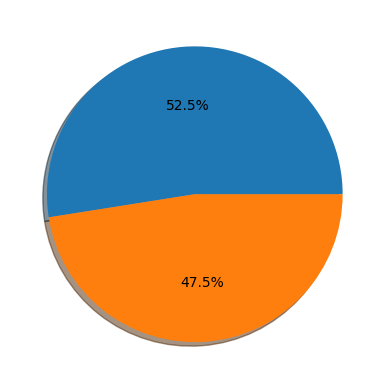

In [4]:
#plt.scatter(df.Age, df.Productivity, marker='+', color='red')
#plt.scatter(df.Time, df.Productivity, marker='+', color='red')
#plt.scatter(df.Coffee, df.Productivity, marker='+', color='red')


#PLot productivity values to see the split between Good and Bad
sizes = df['Productivity'].value_counts(sort = 1)

plt.pie(sizes, shadow=True, autopct='%1.1f%%')
#Good to know so we know the proportion of each label


In [5]:
#STEP 2: DROP IRRELEVANT DATA
#In our example, Images_Analyzed reflects whether it is good analysis or bad
#so should not include it. ALso, User number is just a number and has no inflence
#on the productivity, so we can drop it.

df.drop(['Images_Analyzed'], axis=1, inplace=True)
df.drop(['User'], axis=1, inplace=True)

In [6]:
#STEP 3: Handle missing values, if needed
#df = df.dropna()  #Drops all rows with at least one null value.


#STEP 4: Convert non-numeric to numeric, if needed.
#Sometimes we may have non-numeric data, for example batch name, user name, city name, etc.
#e.g. if data is in the form of YES and NO then convert to 1 and 2

df.Productivity[df.Productivity == 'Good'] = 1
df.Productivity[df.Productivity == 'Bad'] = 2
print(df.head())

   Time  Coffee  Age Productivity
0     8       0   23            1
1    13       0   23            2
2    17       0   23            1
3    22       0   23            2
4     8       2   23            1


<ipython-input-6-65d21a5298ab>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Productivity[df.Productivity == 'Good'] = 1
<ipython-input-6-65d21a5298ab>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Productivity[df.Productivity == 'Bad'] = 2


In [7]:
#STEP 5: PREPARE THE DATA.

#Y is the data with dependent variable, this is the Productivity column
Y = df["Productivity"].values  #At this point Y is an object not of type int
#Convert Y to int
Y=Y.astype('int')

#X is data with independent variables, everything except Productivity column
# Drop label column from X as you don't want that included as one of the features
X = df.drop(labels = ["Productivity"], axis=1)
#print(X.head())

In [8]:
#STEP 6: SPLIT THE DATA into TRAIN AND TEST data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=20)
#random_state can be any integer and it is used as a seed to randomly split dataset.
#By doing this we work with same test dataset evry time, if this is important.
#random_state=None splits dataset randomly every time

#print(X_train)

In [9]:
#STEP 7: Defining the model and training.

from sklearn.linear_model import LogisticRegression   #Import the relevant model
model = LogisticRegression()  #Create an instance of the model.

model.fit(X_train, y_train)  # Train the model using training data

LogisticRegression()

In [10]:
#STEP 8: TESTING THE MODEL BY PREDICTING ON TEST DATA
#AND CALCULATE THE ACCURACY SCORE
prediction_test = model.predict(X_test)

from sklearn import metrics
#Print the prediction accuracy
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

Accuracy =  0.6875


In [11]:
#Test accuracy for various test sizes and see how it gets better with more training data


#UNDERSTAND WHICH VARIABLES HAVE MOST INFLUENCE ON THE OUTCOME
# To get the weights of all the variables

print(model.coef_) #Print the coefficients for each independent variable.
#But it is not clear which one corresponds to what.
#SO let us print both column values and coefficients.
#.Series is a 1-D labeled array capable of holding any data type.
#Default index would be 0,1,2,3... but let us overwrite them with column names for X (independent variables)
weights = pd.Series(model.coef_[0], index=X.columns.values)

print("Weights for each variables is a follows...")
print(weights)

#+VE VALUE INDICATES THAT THE VARIABLE HAS A POSITIVE IMPACT

[[0.16579479 0.33150487 0.02200014]]
Weights for each variables is a follows...
Time      0.165795
Coffee    0.331505
Age       0.022000
dtype: float64
